## <center>Tópicos selectos de análisis de datos<center>
## <center>Tarea 2<center>
## <center>Para entregar el 16 de octubre de 2020<center>
### Evangelina Garza Elizondo

#### Instrucciones: 
- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imágen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x y tensorflow 2.x

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario

#### Indicaciones generales:
- Para los siguientes ejercicios hay usar la librería OpenCV. También, para probar el ejemplo descriptores de textura LBP, codigo08 LBP.ipynb, hay que instalar la librería scikit-image. Puede instalarlas usando las instrucciones:  
__pip install opencv-python__  
__pip install scikit-image__  

Se van crear dos clasificadores que utilizan la base de datos fruit-360, que tienen que descargar:  
https://www.kaggle.com/moltean/fruits  
De esta base seleccionamos las siguientes 30 categorías:  

    - Apple Braeburn - Clementine - Orange - Tamarillo
    - Apple Golden 2 - Cocos - Peach - Tangelo
    - Apple Granny Smith - Corn - Pear - Tomato 4
    - Apple Red Delicious - Fig - Pear Red - Walnut
    - Avocado - Granadilla - Pepper - Green - Watermelon
    - Banana Lady Finger - Lemon - Pepper - Red
    - Cherry 2 - Lychee - Potato White
    - Cherry Wax Yellow - Onion Red - Strawberry

Hay una carpeta llamada _Training_ y otra llamada _Test_ que contienen los datos del conjunto de entrenamiento y del conjunto prueba.  
- Al final hay que entregar un notebook que incluya el código del script que desarrolló y la información que se pide a continuación, a manera de que el propio notebook sirva como reporte de resultados.
- En la descripción de los ejercicios no se especifica el número de capas y de unidades ocultas que deben usar para construir el clasificador. Es parte de la exploración que tienen que realizar para definir la arquitectura de la red. Puede agregar un comentario de las pruebas que realizó antes de llegar al clasificador con que va a presentar los resultados.

## Ejercicio 1
Diseñe una red neuronal profunda densa multiclase que reciba como entrada las imágenes vectorizadas (el tensor de dimensiones _m x n x 3_ se convierte en un vector de tamaño _3mn_) de las categorías seleccionadas de la base de datos fruit-360 y que la salida use una función de activación softmax.

#### 1. Si lo considera necesario, puede aplicar un escalamiento a las imágenes para reducir su tamaño antes de vectorizarlas.

### <font color=green>Respuesta</font>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns 

In [2]:
# Definimos los directorios necesarios
mypath_train='C:/Users/Evangelina Garza/Documents/CIMAT/MCE_3Semestre/CD/data_fruits/Train/'
mypath_test='C:/Users/Evangelina Garza/Documents/CIMAT/MCE_3Semestre/CD/data_fruits/Test/'
fruits=['Apple Braeburn/','Apple Golden 2/','Apple Granny Smith/','Apple Red Delicious/','Avocado/','Banana Lady Finger/',
        'Cherry 2/','Cherry Wax Yellow/','Clementine/','Cocos/','Corn/','Fig/','Granadilla/','Lemon/','Lychee/','Onion Red/',
        'Orange/','Peach/','Pear/','Pear Red/','Pepper Green/','Pepper Red/','Potato White/','Strawberry/','Tamarillo/',
        'Tangelo/','Tomato 4/','Walnut/','Watermelon/']
dir_fruits=os.listdir(mypath_train+fruits[0])

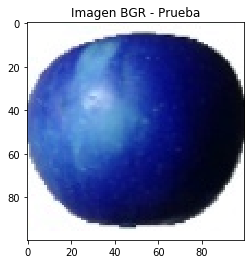

In [3]:
#Cargamos y graficamos un ejemplo en espacio BGR
img = cv2.imread(mypath_train + fruits[0]+dir_fruits[0])
plt.imshow(img)
plt.title('Imagen BGR - Prueba')
plt.show()

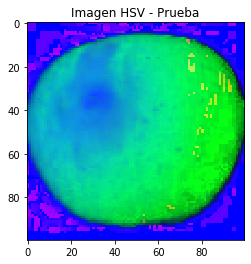

In [4]:
#Imagen prueba en espacio HSV
sv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(sv)
plt.title('Imagen HSV - Prueba')
plt.show()

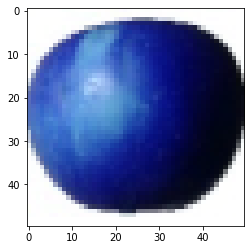

In [5]:
# Prueba para verificar cómo se ve una imagen reescalada
scale_percent = 50 # porcentaje de la imagen real
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# imagen al 50%
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

#### Preparamos los conjuntos de imágenes vectorizadas

In [6]:
scale_percent = 50 
tdim=scale_percent*scale_percent*3

X_train=np.zeros((29*300,tdim))
y_train=np.zeros((29*300,))
X_test=np.zeros((29*90,tdim))
y_test=np.zeros((29*90,))

c=0
for i in range(29):
    dir_fruits=os.listdir(mypath_train+fruits[i])
    for j in range(300):
        img = cv2.imread(mypath_train + fruits[i]+dir_fruits[j])
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img_r=np.reshape(resized,(tdim))
        X_train[c]=img_r
        y_train[c]=i
        c=c+1

In [7]:
c=0
for i in range(29):
    dir_fruits=os.listdir(mypath_test+fruits[i])
    for j in range(90):
        img = cv2.imread(mypath_test + fruits[i]+dir_fruits[j])
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img_r=np.reshape(resized,(tdim))
        X_test[c]=img_r
        y_test[c]=i
        c=c+1

In [8]:
#Estandarizamos los vectores
X_train=X_train/ 255
X_test=X_test/ 255

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD
from keras.utils import to_categorical
from keras import backend as K
import time
import random as rn
tic=time.time()

Using TensorFlow backend.


#### 2. Use los datos del directorio Test como el conjunto de validación para aplicar la estrategia _early stopping_ para evitar el sobreajuste de la red.

#### Modelos.
Se crearon dos modelos, un modelo baseline con una sola capa y un modelo profundo con más capas para verificar cuál de los dos obtiene mejores resultados. En ambos se utiliza la estrategia de Early Stopping y el conjunto _test_ como conjunto de validación de la red. Una vez que se elige el mejor modelo se utilizan dos estrategias diferentes de optimización. 

In [10]:
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
rn.seed(1234)
tf.random.set_seed(89)

In [11]:
y_binary = to_categorical(y_train,29)
test_labels=to_categorical(y_test,29)
test_true_labels      = np.argmax(test_labels, axis=1)

In [12]:
input_dim = tdim 
output_dim = 29 # 29 categorías

In [13]:
#Baseline
baseline_model = Sequential()
baseline_model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))
baseline_model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy','mse', 'mae'])

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [15]:
history=baseline_model.fit(X_train, y_binary, epochs=10, verbose=1,callbacks=[callback],validation_data=(X_test,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/10
8700/8700 [==============================] - 5s 575us/step - loss: 2.0150 - accuracy: 0.6561 - mse: 0.0175 - mae: 0.0269 - val_loss: 0.4333 - val_accuracy: 0.9031 - val_mse: 0.0055 - val_mae: 0.0092
Epoch 2/10
8700/8700 [==============================] - 2s 262us/step - loss: 0.3195 - accuracy: 0.9192 - mse: 0.0045 - mae: 0.0070 - val_loss: 1.2515 - val_accuracy: 0.7751 - val_mse: 0.0125 - val_mae: 0.0167
Epoch 3/10
8700/8700 [==============================] - 2s 263us/step - loss: 0.2190 - accuracy: 0.9474 - mse: 0.0029 - mae: 0.0043 - val_loss: 0.4949 - val_accuracy: 0.9203 - val_mse: 0.0045 - val_mae: 0.0057
Epoch 4/10
8700/8700 [==============================] - 2s 286us/step - loss: 0.1182 - accuracy: 0.9692 - mse: 0.0017 - mae: 0.0026 - val_loss: 0.3060 - val_accuracy: 0.9483 - val_mse: 0.0029 - val_mae: 0.0039
Epoch 5/10
8700/8700 [==============================] - 3s 301us/step - loss: 0.0973 - accuracy: 0.9757 - mse: 0

In [16]:
baseline_model.evaluate(X_test, test_labels)

2610/2610 [==============================] - 0s 120us/step


[0.5511449010780217,
 0.936398446559906,
 0.003945688251405954,
 0.0044355206191539764]

La estrategía _Early Stopping_ en este caso no funcionó como lo esperaríamos, pero uno de los factores puede ser el bajo número de épocas que se utilizaron. No se consideraron necesarias más debido a la baja complejidad tanto del modelo como del conjunto de datos a utilizar. Las altas puntuaciones en el accuracy score del conjunto tanto de entrenamiento como de validación nos dejan ver que el conjunto es fácilmente separable y no se requieren modelos tan complejos/profundos como se requieren usalmente con otros conjuntos de imágenes. De igual manera se implementa un modelo profundo con más capas, para propósitos de comparación.

In [17]:
keras_model = Sequential()
keras_model.add(Dense(64, activation='relu', input_dim=input_dim))
keras_model.add(Dropout(0.01))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(output_dim,activation='softmax'))
keras_model.compile(loss="categorical_crossentropy", optimizer='RMSprop', metrics=['accuracy','mse', 'mae'])

In [18]:
history_keras=keras_model.fit(X_train, y_binary, epochs=10, verbose=1,callbacks=[callback],validation_data=(X_test,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/10
8700/8700 [==============================] - 5s 608us/step - loss: 2.3889 - accuracy: 0.3618 - mse: 0.0265 - mae: 0.0543 - val_loss: 1.1225 - val_accuracy: 0.6617 - val_mse: 0.0160 - val_mae: 0.0367
Epoch 2/10
8700/8700 [==============================] - 5s 596us/step - loss: 0.5850 - accuracy: 0.8469 - mse: 0.0085 - mae: 0.0211 - val_loss: 0.7374 - val_accuracy: 0.7797 - val_mse: 0.0112 - val_mae: 0.0209
Epoch 3/10
8700/8700 [==============================] - 5s 553us/step - loss: 0.2582 - accuracy: 0.9305 - mse: 0.0038 - mae: 0.0095 - val_loss: 0.3217 - val_accuracy: 0.9295 - val_mse: 0.0036 - val_mae: 0.0082
Epoch 4/10
8700/8700 [==============================] - 5s 540us/step - loss: 0.1721 - accuracy: 0.9528 - mse: 0.0025 - mae: 0.0058 - val_loss: 0.3739 - val_accuracy: 0.9211 - val_mse: 0.0041 - val_mae: 0.0079
Epoch 5/10
8700/8700 [==============================] - 5s 552us/step - loss: 0.1347 - accuracy: 0.9623 - mse: 0

Este último modelo, además de que es computacionalmente más costoso (número de parámetros, tiempo, etc.), no nos permitió incrementar la precisión en el conjunto de entrenamiento ni en el de validación. La estrategia _Early Stopping_ sí funcionó en este modelo debido a que no terminó todas las épocas indicadas.

#### 3. Entrene la red usando dos estrategias de optimización diferentes.

Primero se utilizan dos estrategias diferentes, un primer optimizador es el __'RMSprop'__ que fue utilizado anteriormente, y a continuación se presenta con el optimizador __'SGD'__ para ambos modelos el baseline y el segundo modelo propuesto.

In [19]:
baseline_model_sgd = Sequential()
baseline_model_sgd.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))
baseline_model_sgd.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy','mse', 'mae'])

In [20]:
history_sgd=baseline_model_sgd.fit(X_train, y_binary, epochs=10, verbose=1,callbacks=[callback],validation_data=(X_test,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/10
8700/8700 [==============================] - 2s 214us/step - loss: 1.3281 - accuracy: 0.7148 - mse: 0.0149 - mae: 0.0352 - val_loss: 0.5621 - val_accuracy: 0.8782 - val_mse: 0.0076 - val_mae: 0.0229
Epoch 2/10
8700/8700 [==============================] - 2s 213us/step - loss: 0.2877 - accuracy: 0.9579 - mse: 0.0035 - mae: 0.0141 - val_loss: 0.4314 - val_accuracy: 0.8893 - val_mse: 0.0059 - val_mae: 0.0174
Epoch 3/10
8700/8700 [==============================] - 2s 202us/step - loss: 0.1779 - accuracy: 0.9817 - mse: 0.0020 - mae: 0.0094 - val_loss: 0.3479 - val_accuracy: 0.9153 - val_mse: 0.0046 - val_mae: 0.0135
Epoch 4/10
8700/8700 [==============================] - 2s 204us/step - loss: 0.1306 - accuracy: 0.9889 - mse: 0.0014 - mae: 0.0072 - val_loss: 0.3270 - val_accuracy: 0.9372 - val_mse: 0.0040 - val_mae: 0.0123
Epoch 5/10
8700/8700 [==============================] - 2s 202us/step - loss: 0.1030 - accuracy: 0.9934 - mse: 9

In [21]:
keras_model_sgd = Sequential()
keras_model_sgd.add(Dense(64, activation='relu', input_dim=input_dim))
keras_model_sgd.add(Dropout(0.01))
keras_model_sgd.add(Dense(32, activation='relu'))
keras_model_sgd.add(Dense(output_dim,activation='softmax'))
keras_model_sgd.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy','mse', 'mae'])

In [22]:
history_keras_sgd=keras_model_sgd.fit(X_train, y_binary, epochs=10, verbose=1,callbacks=[callback],validation_data=(X_test,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/10
8700/8700 [==============================] - 3s 394us/step - loss: 2.3760 - accuracy: 0.3386 - mse: 0.0277 - mae: 0.0584 - val_loss: 1.3127 - val_accuracy: 0.6207 - val_mse: 0.0195 - val_mae: 0.0441
Epoch 2/10
8700/8700 [==============================] - 4s 448us/step - loss: 0.6487 - accuracy: 0.8561 - mse: 0.0093 - mae: 0.0261 - val_loss: 0.5681 - val_accuracy: 0.8479 - val_mse: 0.0081 - val_mae: 0.0212
Epoch 3/10
8700/8700 [==============================] - 4s 456us/step - loss: 0.2681 - accuracy: 0.9402 - mse: 0.0037 - mae: 0.0122 - val_loss: 0.3777 - val_accuracy: 0.9065 - val_mse: 0.0053 - val_mae: 0.0137
Epoch 4/10
8700/8700 [==============================] - 4s 435us/step - loss: 0.1564 - accuracy: 0.9695 - mse: 0.0021 - mae: 0.0076 - val_loss: 0.2928 - val_accuracy: 0.9138 - val_mse: 0.0045 - val_mae: 0.0106
Epoch 5/10
8700/8700 [==============================] - 3s 391us/step - loss: 0.1140 - accuracy: 0.9767 - mse: 0

In [23]:
K.clear_session()

Como se puede ver, este optimizador produjo mejores resultados en cuanto a la precisión comparando cada modelo con su par del primer optimizador, una de las razones por las que se cree es la rapidez con la que converge al mínimo de la función de pérdida, que en el caso del primer optimizador no siempre se traduce como una mejora en las predicciones realizadas. Tomando en cuenta las métricas de accuracy tanto para el modelo baseline y el modelo keras bajo ambos optimizadores el mejor modelo fue el modelo keras utilizando __'SGD'__.

#### 4. Describa la arquitectura de la red que diseño y , la cantidad de parámetros que tiene, el número de épocas que se realizaron y el tiempo promedio que tarda cada época para cada una estrategias de optimización. Reporte el valor que alcanza la función de pérdida y la exactitud. Puede generar una gráfica que muestre estos datos.

Se muestra el resumen para cada uno de los 4 modelos propuestos: Baseline RMSprop, Baseline SGD, Modelo Keras RMSprop y Modelo Keras SGD. En el primer modelo se utilizó únicamente una capa de salida densa con función de activación softmax para la clasificación multiclase. En los últimos dos modelos se utilizaron dos capas densas adicionales a la ya mencionada con activación relu, cada una con 64 y 32 unidades ocultas, además de una capa de regularización dropout entre ambas capas ocultas. En las siguientes tablas también se muestra el número de parámetros utilizados, que son más del doble del modelo baseline para los dos últimos modelos. Esto puede explicar las mejoras en cuanto a la precisión. En todos los modelos se realizaron 10 épocas, debido a la simplicidad de los datos no se consideraron necesarias más. 

In [24]:
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 29)                217529    
Total params: 217,529
Trainable params: 217,529
Non-trainable params: 0
_________________________________________________________________


In [25]:
baseline_model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 29)                217529    
Total params: 217,529
Trainable params: 217,529
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                480064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 29)                957       
Total params: 483,101
Trainable params: 483,101
Non-trainable params: 0
_________________________________________________________________


In [27]:
keras_model_sgd.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                480064    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 29)                957       
Total params: 483,101
Trainable params: 483,101
Non-trainable params: 0
_________________________________________________________________


El tiempo de procesamiento promedio por época es de 3 segundos para ambos modelos baseline, 5 seg para modelo keras RMSprop y 4 segundos para el modelo keras con el optimizador SGD. Las métricas de accuracy para el conjunto de entrenamiento como para el conjunto de validación se muestran en las gráficas a continuación:

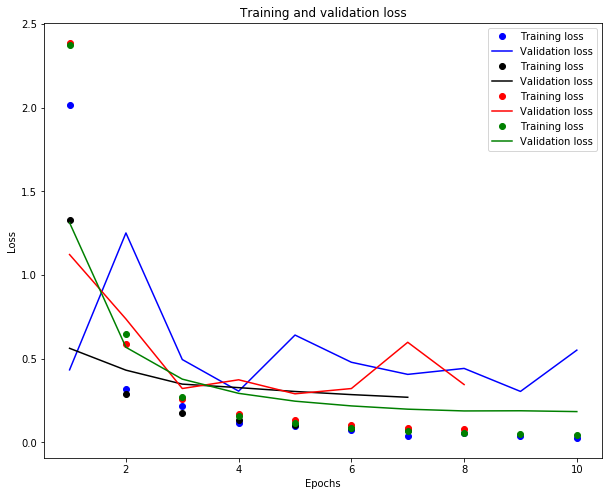

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

loss1 = history_sgd.history['loss']
val_loss1 = history_sgd.history['val_loss']

loss2 = history_keras.history['loss']
val_loss2 = history_keras.history['val_loss']

loss3 = history_keras_sgd.history['loss']
val_loss3 = history_keras_sgd.history['val_loss']

epochs = range(1, len(loss) + 1)
epochs1 = range(1, len(loss1) + 1)
epochs2 = range(1, len(loss2) + 1)
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(10,8))

#Lineas y puntos AZULES para el Modelo BASELINE RMSprop
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

#Lineas y puntos NEGROS para el Modelo BASELINE SGD
plt.plot(epochs1, loss1, 'ko', label='Training loss')
plt.plot(epochs1, val_loss1, 'k', label='Validation loss')

#Lineas y puntos ROJOS para el Modelo KERAS RMSPROP
plt.plot(epochs2, loss2, 'ro', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')

#Lineas y puntos verdes para el Modelo KERAS SGD
plt.plot(epochs3, loss3, 'go', label='Training loss')
plt.plot(epochs3, val_loss3, 'g', label='Validation loss')


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

A partir de esta grafica se puede ver que el modelo que tuvo en conjunto menor pérdida tanto en el conjunto de entrenamiento como en el de validación fue el modelo SGD. El modelo baseline presenta una mayor pérdida en cuanto al conjunto de validación comparado con los otros dos modelos.

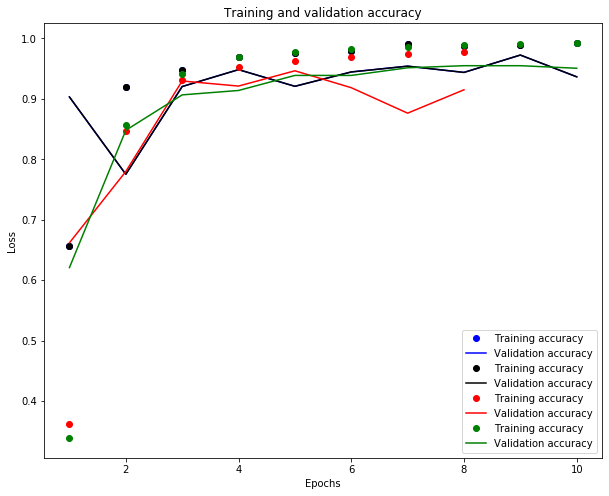

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

acc1 = history_sgd.history['accuracy']
val_acc1 = history_sgd.history['val_accuracy']

acc2 = history_keras.history['accuracy']
val_acc2 = history_keras.history['val_accuracy']

acc3 = history_keras_sgd.history['accuracy']
val_acc3 = history_keras_sgd.history['val_accuracy']

epochs = range(1, len(loss) + 1)
epochs1 = range(1, len(loss1) + 1)
epochs2 = range(1, len(loss2) + 1)
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(10,8))

#Lineas y puntos AZULES para el Modelo BASELINE RMSPROP
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

#Lineas y puntos NEGROS para el Modelo BASELINE SGD
plt.plot(epochs, acc, 'ko', label='Training accuracy')
plt.plot(epochs, val_acc, 'k', label='Validation accuracy')

#Lineas y puntos ROJOS para el Modelo KERAS RMSPROP
plt.plot(epochs2, acc2, 'ro', label='Training accuracy')
plt.plot(epochs2, val_acc2, 'r', label='Validation accuracy')

#Lineas y puntos verdes para el Modelo KERAS SGD
plt.plot(epochs3, acc3, 'go', label='Training accuracy')
plt.plot(epochs3, val_acc3, 'g', label='Validation accuracy')


plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

En cuanto a la precisión, en la gráfica anterior se puede apreciar que todos los modelos logran una precisión tanto para el conjunto de entrenamiento como para el de validación de más del 90%. Los valores faltantes tanto de esta gráfica como de la anterior se deben a cómo funcionó la estrategia _Early Stopping_ para cada uno de ellos, ya que en algunos no fueron necesarias las 10 épocas. 

#### 5. Se proporcionará un conjunto de imágenes que no pertenecen a esta base de datos para que lo use como conjunto de prueba. La liga para descargar este conjunto se le comunicará a inicios de la próxima semana. Genere la matriz de confusión de los resultados del clasificador con ese conjunto de prueba. Revise las imágenes de ese conjunto en las categorías donde el clasificador se equivoque más y agregue un comentario sobre si se justifican los errores de alguna manera por las diferencias que note con respecto al conjunto con el que fue entrenado el clasificador.

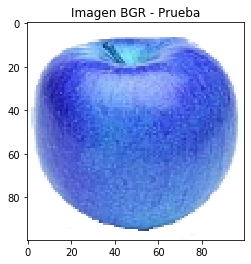

In [30]:
mypath_new='C:/Users/Evangelina Garza/Documents/CIMAT/MCE_3Semestre/CD/conjuntoPrueba/imagenes/'
dir_new=os.listdir(mypath_new+fruits[0])
img = cv2.imread(mypath_new + fruits[0]+dir_new[0])
plt.imshow(img)
plt.title('Imagen BGR - Prueba')
plt.show()

In [31]:
scale_percent = 50 
tdim=scale_percent*scale_percent*3

X_new=np.zeros((744,tdim))
y_new=np.zeros((744,))

c=0
for i in range(29):
    dir_new=os.listdir(mypath_new+fruits[i])
    for j in range(len(dir_new)):
        img = cv2.imread(mypath_new + fruits[i]+dir_new[j])
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img_r=np.reshape(resized,(tdim))
        X_new[c]=img_r
        y_new[c]=i
        c=c+1

In [32]:
y_bin=to_categorical(y_new,29)
X_new=X_new/255

Se evalúan los cuatro modelos en seguida, y cuyas métricas aparecen en el siguiente orden: 
* Pérdida (val_loss)
* Accuracy (val_accuracy)
* MSE (val_mse)
* MAE (val_mae)

In [33]:
keras_model_sgd.evaluate(X_new, y_bin)

744/744 [==============================] - 0s 142us/step


[5.467861657501549,
 0.2594085931777954,
 0.03930182754993439,
 0.051704976707696915]

In [34]:
baseline_model_sgd.evaluate(X_new, y_bin)

744/744 [==============================] - 0s 136us/step


[3.4938846865007953,
 0.2688172161579132,
 0.03477313369512558,
 0.05330068990588188]

In [35]:
keras_model.evaluate(X_new, y_bin)

744/744 [==============================] - 0s 171us/step


[10.109145272162653,
 0.2244623601436615,
 0.04674651473760605,
 0.05403131991624832]

In [36]:
baseline_model.evaluate(X_new, y_bin)

744/744 [==============================] - 0s 140us/step


[13.350777236364221,
 0.26075267791748047,
 0.04576781019568443,
 0.05101097375154495]

Todos los modelos tienen un performance muy deficiente, lo que nos indica la debilidad de estos modelos a trabajar con imágenes externas al conjunto original. Cabe destacar que el conjnuto original se conforma de imágenes tomadas bajo las mismas condiciones de luz, fondo, etc., por lo que fue fácil lograr métricas muy buenas para los modelos propuestos.  

## Ejercicio 2

Diseñe una red neuronal profunda densa multiclase que reciba como entrada un vector de características relacionadas con la forma, color y textura de las variedades de frutas seleccionadas de la base de datos fruit-360 y que la salida use una función de activación softmax.

#### 1. Puede usar como referencia el script _generadorCaracteristicas.ipynb_ para construir la matriz con los datos para el conjunto de entrenamiento y validación.

Para la generación de una matriz de características para este conjunto de imágenes en específico se consideran importantes además las ya señaladas por el problema algunas otras como lo son la luminosidad, la saturación de color, la profundidad, entre otras que no pueden ser obtenidas a través del uso de un solo espacio de color. Por lo tanto se propone utilizar 3 espacios de color para representar a cada imagen: BGR, HSV y LAB, además se agregará información sobre la forma de la fruta con su contorno. Para obtener el contorno de las imágenes se utilizará las funciones vistas en clase y programadas pro el Dr. Joaquín, mientras que para la representación de cada uno de los espacios se utilizarán las funciones de la librería __opencv__.

#### 2. Proponga y programe las funciones que calculan las características de la imagen. Tiene que describir brevemente el tipo de características que está calculando para que se pueda evaluar si están bien las implementaciones. Puede agregar imágenes de las fórmulas que está usando, agregar referencias si usa alguna característica diferente a las vistas en clase, etc.

In [37]:
#Funciones programadas por el Dr. Joaquín peña y vistas en clase

#Función que determina las coordenadas de los pixeles en la frontera de la figura de interés
def maxContour(contours):
    cnt_list = np.zeros(len(contours))
    for i in range(0,len(contours)):
        cnt_list[i] = cv2.contourArea(contours[i])
    max_value = np.amax(cnt_list)
    max_index = np.argmax(cnt_list)
    return max_index

#Función que nos regresa la máscara binaria de acuerdo a los pixeles en el contorno
def getMask(bgrimg):
    labimg  = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2LAB)
    m,n     = labimg.shape[:2]
    mask    = 255*np.ones((m,n), dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            if labimg[i,j,0]>246 and abs(labimg[i,j,1]-128)<6 and abs(labimg[i,j,2]-130)<6:
                mask[i,j] = 0
    
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imax  = maxContour(contours)
    mask  = np.zeros((m,n), dtype=np.uint8)
    mask  = cv2.drawContours(mask, contours, imax, 255, -1) 
    return mask

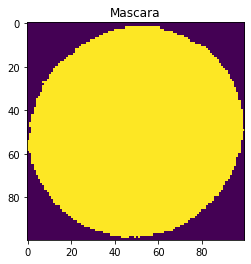

In [38]:
contour_img=getMask(img)
plt.imshow(contour_img)
plt.title('Mascara')
plt.show()

In [39]:
scale_percent = 50 
tdim=(scale_percent*scale_percent*3)*3+(scale_percent*scale_percent)
t_dim=scale_percent*scale_percent*3

X_train2=np.zeros((29*300,tdim))
y_train2=np.zeros((29*300,))
X_test2=np.zeros((29*90,tdim))
y_test2=np.zeros((29*90,))

In [40]:
c=0
for i in range(29):
    dir_fruits=os.listdir(mypath_train+fruits[i])
    for j in range(300):     
        img_bgr = cv2.imread(mypath_train + fruits[i]+dir_fruits[j])
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
        img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
        
        width = int(img_bgr.shape[1] * scale_percent / 100)
        height = int(img_bgr.shape[0] * scale_percent / 100)
        dim = (width, height)
        
        rsz_bgr = cv2.resize(img_bgr, dim, interpolation = cv2.INTER_AREA)
        rsz_hsv = cv2.resize(img_hsv, dim, interpolation = cv2.INTER_AREA)
        rsz_lab = cv2.resize(img_lab, dim, interpolation = cv2.INTER_AREA)
        
        img_contour=getMask(rsz_bgr)
        
        r_bgr=np.reshape(rsz_bgr,(t_dim))
        r_hsv=np.reshape(rsz_hsv,(t_dim))
        r_lab=np.reshape(rsz_lab,(t_dim))
        r_cont=np.reshape(img_contour,(scale_percent*scale_percent))
        
        char = np.concatenate([r_bgr,r_hsv,r_lab,r_cont])
        
        X_train2[c,]=char
        y_train2[c]=i
        c=c+1

In [41]:
c=0
for i in range(29):
    dir_fruits=os.listdir(mypath_test+fruits[i])
    for j in range(90):     
        img_bgr = cv2.imread(mypath_test + fruits[i]+dir_fruits[j])
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
        img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
        
        width = int(img_bgr.shape[1] * scale_percent / 100)
        height = int(img_bgr.shape[0] * scale_percent / 100)
        dim = (width, height)
        
        rsz_bgr = cv2.resize(img_bgr, dim, interpolation = cv2.INTER_AREA)
        rsz_hsv = cv2.resize(img_hsv, dim, interpolation = cv2.INTER_AREA)
        rsz_lab = cv2.resize(img_lab, dim, interpolation = cv2.INTER_AREA)
        
        img_contour=getMask(rsz_bgr)
        
        r_bgr=np.reshape(rsz_bgr,(t_dim))
        r_hsv=np.reshape(rsz_hsv,(t_dim))
        r_lab=np.reshape(rsz_lab,(t_dim))
        r_cont=np.reshape(img_contour,(scale_percent*scale_percent))
        
        char = np.concatenate([r_bgr,r_hsv,r_lab,r_cont])
        
        X_test2[c,]=char
        y_test2[c]=i
        c=c+1

#### 3. Repita los pasos del 2 al 5 del Ejercicio 1 para construir el clasificador y evaluarlo.

Para trabajar con este nuevo conjunto de datos, se proponen utilizar como modelo baseline el modelo keras con optimimizador __SGD__ que fue el que tuvo mejor resultado de los 4. De acuerdo a los resultados obtenidos bajo este modelo, se analizará si es necesario cambiar la estrategia y proponer una red más profunda o únicamente se requieren algunos ajustes. 

In [42]:
y_binary2 = to_categorical(y_train2,29)
test_labels2=to_categorical(y_test2,29)
X_train2=X_train2/ 255
X_test2=X_test2/ 255

In [43]:
input_dim = tdim

In [44]:
keras_model_sgd2 = Sequential()
keras_model_sgd2.add(Dense(64, activation='relu', input_dim=input_dim))
keras_model_sgd2.add(Dropout(0.01))
keras_model_sgd2.add(Dense(32, activation='relu'))
keras_model_sgd2.add(Dense(output_dim,activation='softmax'))
keras_model_sgd2.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy','mse', 'mae'])

In [45]:
history2_keras_sgd=keras_model_sgd2.fit(X_train2, y_binary2, epochs=10, verbose=1,callbacks=[callback],validation_data=(X_test2,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/10
8700/8700 [==============================] - 13s 2ms/step - loss: 2.6142 - accuracy: 0.2377 - mse: 0.0297 - mae: 0.0609 - val_loss: 1.7420 - val_accuracy: 0.5126 - val_mse: 0.0242 - val_mae: 0.0522
Epoch 2/10
8700/8700 [==============================] - 7s 844us/step - loss: 1.0782 - accuracy: 0.6861 - mse: 0.0159 - mae: 0.0371 - val_loss: 0.8824 - val_accuracy: 0.7571 - val_mse: 0.0134 - val_mae: 0.0291
Epoch 3/10
8700/8700 [==============================] - 8s 872us/step - loss: 0.4950 - accuracy: 0.8769 - mse: 0.0071 - mae: 0.0192 - val_loss: 0.6628 - val_accuracy: 0.8042 - val_mse: 0.0101 - val_mae: 0.0213s: 0.5170 - accu
Epoch 4/10
8700/8700 [==============================] - 7s 830us/step - loss: 0.3012 - accuracy: 0.9415 - mse: 0.0038 - mae: 0.0114 - val_loss: 0.4599 - val_accuracy: 0.8705 - val_mse: 0.0063 - val_mae: 0.0147
Epoch 5/10
8700/8700 [==============================] - 8s 946us/step - loss: 0.2213 - accuracy: 

Para este primer clasificador las métricas son bastante buenas, sin embargo consideramos que se puede mejorar. Se propone aumentar el número de épocas, al ser este un conjunto de datos mucho más complejo (contiene más del triple de características que el primer conjunto de datos) además de una nueva capa densa con activación relu y una nueva capa de dropout entre la nueva capa y la siguiente. 

In [46]:
keras_model_sgd3 = Sequential()
keras_model_sgd3.add(Dense(64, activation='relu', input_dim=input_dim))
keras_model_sgd3.add(Dropout(0.01))
keras_model_sgd3.add(Dense(32, activation='relu'))
keras_model_sgd3.add(Dropout(0.01))
keras_model_sgd3.add(Dense(32, activation='relu'))
keras_model_sgd3.add(Dense(output_dim,activation='softmax'))
keras_model_sgd3.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy','mse', 'mae'])

In [47]:
history3_keras_sgd=keras_model_sgd3.fit(X_train2, y_binary2, epochs=15, verbose=1,callbacks=[callback],validation_data=(X_test2,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/15
8700/8700 [==============================] - 9s 1ms/step - loss: 2.8889 - accuracy: 0.1631 - mse: 0.0314 - mae: 0.0637 - val_loss: 1.9597 - val_accuracy: 0.3529 - val_mse: 0.0269 - val_mae: 0.0561
Epoch 2/15
8700/8700 [==============================] - 9s 1ms/step - loss: 1.1344 - accuracy: 0.6731 - mse: 0.0165 - mae: 0.0379 - val_loss: 0.6348 - val_accuracy: 0.7969 - val_mse: 0.0098 - val_mae: 0.0245
Epoch 3/15
8700/8700 [==============================] - 9s 1ms/step - loss: 0.4246 - accuracy: 0.8869 - mse: 0.0062 - mae: 0.0160 - val_loss: 0.3624 - val_accuracy: 0.8793 - val_mse: 0.0055 - val_mae: 0.0135
Epoch 4/15
8700/8700 [==============================] - 9s 978us/step - loss: 0.2530 - accuracy: 0.9359 - mse: 0.0035 - mae: 0.0093 - val_loss: 0.2919 - val_accuracy: 0.9184 - val_mse: 0.0041 - val_mae: 0.0093
Epoch 5/15
8700/8700 [==============================] - 9s 995us/step - loss: 0.1814 - accuracy: 0.9524 - mse: 0.0025 

Al agregar una nueva capa de activación se pueden obtener muy altos niveles de accuracy tanto para el conjunto de entrenamiento pero más específicamente en el de validación. Se propone también el uso de un optimizador distinto para comparar este nuevo modelo, que será el __Adam__

In [48]:
keras_model_adam = Sequential()
keras_model_adam.add(Dense(64, activation='relu', input_dim=input_dim))
keras_model_adam.add(Dropout(0.01))
keras_model_adam.add(Dense(32, activation='relu'))
keras_model_adam.add(Dropout(0.01))
keras_model_adam.add(Dense(32, activation='relu'))
keras_model_adam.add(Dense(output_dim,activation='softmax'))
keras_model_adam.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy','mse', 'mae'])

In [49]:
history_keras_adam=keras_model_adam.fit(X_train2, y_binary2, epochs=15, verbose=1,callbacks=[callback],validation_data=(X_test2,test_labels))

Train on 8700 samples, validate on 2610 samples
Epoch 1/15
8700/8700 [==============================] - 16s 2ms/step - loss: 1.9020 - accuracy: 0.4949 - mse: 0.0219 - mae: 0.0467 - val_loss: 0.5370 - val_accuracy: 0.8716 - val_mse: 0.0084 - val_mae: 0.0214
Epoch 2/15
8700/8700 [==============================] - 15s 2ms/step - loss: 0.3636 - accuracy: 0.9101 - mse: 0.0050 - mae: 0.0128 - val_loss: 0.3718 - val_accuracy: 0.8935 - val_mse: 0.0057 - val_mae: 0.0142
Epoch 3/15
8700/8700 [==============================] - 15s 2ms/step - loss: 0.2112 - accuracy: 0.9509 - mse: 0.0028 - mae: 0.0069 - val_loss: 0.2919 - val_accuracy: 0.9272 - val_mse: 0.0038 - val_mae: 0.0073
Epoch 4/15
8700/8700 [==============================] - 15s 2ms/step - loss: 0.1461 - accuracy: 0.9591 - mse: 0.0021 - mae: 0.0049 - val_loss: 0.2187 - val_accuracy: 0.9460 - val_mse: 0.0027 - val_mae: 0.0052
Epoch 5/15
8700/8700 [==============================] - 15s 2ms/step - loss: 0.1190 - accuracy: 0.9683 - mse: 0.0017

Se pueden ver dos desventajas claras de usar este último modelo: El tiempo de procesamiento de los datos por cada época es casi el doble al modelo equivalente bajo el optimizador SGD, y las métricas que se escogieron para evaluar este modelo, que son el accuracy tanto de entrenamiento como de validación son mucho más bajas que el modelo anterior. Para hacer una mejor comparación de los modelos se agregan los datos de arquitectura y las gráficas de validación y de pérdida. 

In [50]:
keras_model_sgd2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1600064   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 29)                957       
Total params: 1,603,101
Trainable params: 1,603,101
Non-trainable params: 0
_________________________________________________________________


In [51]:
keras_model_sgd3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1600064   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 29)                957       
Total params: 1,604,157
Trainable params: 1,604,157
Non-trainable params: 0
____________________________________________

In [52]:
keras_model_adam.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1600064   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 29)                957       
Total params: 1,604,157
Trainable params: 1,604,157
Non-trainable params: 0
____________________________________________

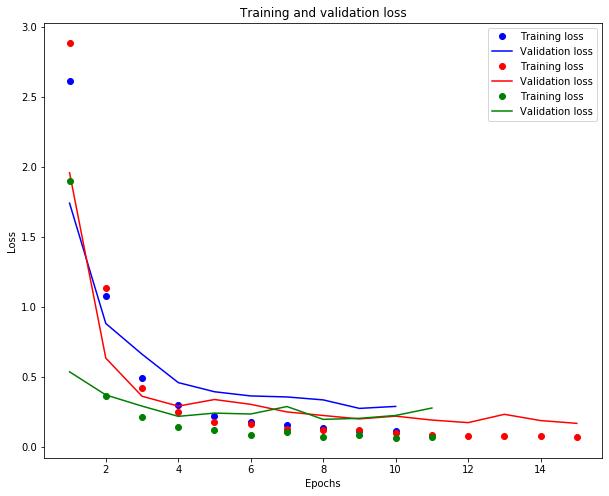

In [53]:
loss = history2_keras_sgd.history['loss']
val_loss = history2_keras_sgd.history['val_loss']

loss2 = history3_keras_sgd.history['loss']
val_loss2 = history3_keras_sgd.history['val_loss']

loss3 = history_keras_adam.history['loss']
val_loss3 = history_keras_adam.history['val_loss']

epochs = range(1, len(loss) + 1)
epochs2 = range(1, len(loss2) + 1)
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(10,8))

#Lineas y puntos AZULES para el Modelo BASELINE RMSprop
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

#Lineas y puntos ROJOS para el Modelo KERAS RMSPROP
plt.plot(epochs2, loss2, 'ro', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')

#Lineas y puntos verdes para el Modelo KERAS SGD
plt.plot(epochs3, loss3, 'go', label='Training loss')
plt.plot(epochs3, val_loss3, 'g', label='Validation loss')


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

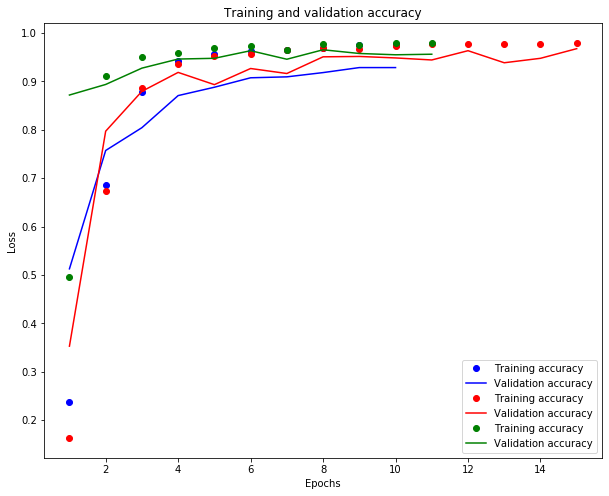

In [54]:
acc = history2_keras_sgd.history['accuracy']
val_acc = history2_keras_sgd.history['val_accuracy']

acc2 = history3_keras_sgd.history['accuracy']
val_acc2 = history3_keras_sgd.history['val_accuracy']

acc3 = history_keras_adam.history['accuracy']
val_acc3 = history_keras_adam.history['val_accuracy']

epochs = range(1, len(loss) + 1)
epochs2 = range(1, len(loss2) + 1)
epochs3 = range(1, len(loss3) + 1)

plt.figure(figsize=(10,8))

#Lineas y puntos AZULES para el Modelo BASELINE RMSPROP
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

#Lineas y puntos ROJOS para el Modelo KERAS RMSPROP
plt.plot(epochs2, acc2, 'ro', label='Training accuracy')
plt.plot(epochs2, val_acc2, 'r', label='Validation accuracy')

#Lineas y puntos verdes para el Modelo KERAS SGD
plt.plot(epochs3, acc3, 'go', label='Training accuracy')
plt.plot(epochs3, val_acc3, 'g', label='Validation accuracy')


plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se puede ver la clara mejoría que se presentó con el segundo clasificador, en comparación con el primero y el tercero, siendo el último de estos el que presentó peores métricas y tiempos de procesamiento. Para el nuevo conjunto de datos se utiliza únicamente el mejor modelo de entre los 3, es decir el segundo. Además el segundo modelo fue el que procesó los datos utilizando todas las épocas indicadas, lo que nos dice que el modelo siguió presentando mejoría.

#### Nuevo conjunto de datos

In [55]:
scale_percent = 50 
tdim=(scale_percent*scale_percent*3)*3+(scale_percent*scale_percent)
t_dim=scale_percent*scale_percent*3

X_new2=np.zeros((744,tdim))
y_new2=np.zeros((744,))

In [56]:
c=0
for i in range(29):
    dir_new=os.listdir(mypath_new+fruits[i])
    for j in range(len(dir_new)):     
        img_bgr = cv2.imread(mypath_new + fruits[i]+dir_new[j])
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
        img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
        
        width = int(img_bgr.shape[1] * scale_percent / 100)
        height = int(img_bgr.shape[0] * scale_percent / 100)
        dim = (width, height)
        
        rsz_bgr = cv2.resize(img_bgr, dim, interpolation = cv2.INTER_AREA)
        rsz_hsv = cv2.resize(img_hsv, dim, interpolation = cv2.INTER_AREA)
        rsz_lab = cv2.resize(img_lab, dim, interpolation = cv2.INTER_AREA)
        
        img_contour=getMask(rsz_bgr)
        
        r_bgr=np.reshape(rsz_bgr,(t_dim))
        r_hsv=np.reshape(rsz_hsv,(t_dim))
        r_lab=np.reshape(rsz_lab,(t_dim))
        r_cont=np.reshape(img_contour,(scale_percent*scale_percent))
        
        char = np.concatenate([r_bgr,r_hsv,r_lab,r_cont])
        
        X_new2[c,]=char
        y_new2[c]=i
        c=c+1

In [57]:
y_bin2=to_categorical(y_new2,29)
X_new2=X_new2/255

Se evalúan los cuatro modelos en seguida, y cuyas métricas aparecen en el siguiente orden: 
* Pérdida (val_loss)
* Accuracy (val_accuracy)
* MSE (val_mse)
* MAE (val_mae)

In [58]:
keras_model_sgd3.evaluate(X_new2,y_bin2)

744/744 [==============================] - 0s 416us/step


[6.511094770123882,
 0.2177419364452362,
 0.04445601627230644,
 0.054942019283771515]

In [59]:
keras_model_sgd2.evaluate(X_new2,y_bin2)

744/744 [==============================] - 0s 365us/step


[6.0072998590366815,
 0.1989247351884842,
 0.04380551725625992,
 0.055605243891477585]

In [60]:
keras_model_adam.evaluate(X_new2,y_bin2)

744/744 [==============================] - 0s 351us/step


[10.54820538592595,
 0.19489246606826782,
 0.048748914152383804,
 0.055374592542648315]

Al igual que en el problema anterior, el performance de nuestros modelos evaluados con un conjunto de imágenes externos es muy pobre, tanto las métricas de pérdida son muy altas, como las métricas de precisión muy bajas. A pesar de que se incluyeron muchas más características de representación como lo son intensidad, tono, profundidad, contorno, etc., esto no permitió mejorar ni en comparación con los modelos del primer inciso.

#### 4. Escriba una opinión sobre estas dos maneras de crear los clasificadores, es decir, siguiendo el enfoque del Ejercicio 1 y 2, las ventajas y desventajas que se tienen y, a partir de los resultados obtenidos, discutir si las características que propuso permiten clasificar los datos de manera similar al clasificador del Ejercicio 1.

Considero que en general el enfoque al construir estos clasificadores puede permitir obtener altos niveles de precisión debido a que se entrenan alrededor de las características deseadas. La gran desventaja como se pudo ver en el Ejercicio 1 y 2, es cuando se requiere evaluar o utilizar conjuntos de imágenes externas, en donde no se controlan las condiciones en donde son tomadas estas imágenes por lo que no podemos asegurarnos que una manzana o cereza, de una fuente externa tenga los mismos valores del espectro ya sea BGR, HSV, o cualquier otro espacio que se utilice en su representación de nuestro conjunto de entrenamiento. Además, se considera que el conjunto de entrenamiento/validación que se utilizó es relativamente pequeño para ser resuelto con un enfoque de redes neuronales. Esto se ve más claramente con los puntajes obtenidos utilizando los moelos más sencillos. Debido a que el conjunto era pequeño y sencillamente separable, un modelo con una sola capa permite obtener altos puntajes de precisión, que son mejorados, pero no en gran manera por modelos más complejos y profundos. Una mejoría general que se propone para mejorar las métricas para conjuntos de imágenes externas es incluirlas en el entrenamiento de la red y aumentar significativamente el número de datos que se utilizan. 